# Histogram Equalization

Author: YinTaiChen

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

class imageLoader:
    def __init__(self, image):
        %matplotlib inline
        self.img = Image.open(image)
        self.gray = self.img.convert(mode="L")
        self.array_3d = np.array(self.img)
        self.array_1d = np.array(self.gray)
    
    def show(self):
        plt.imshow(self.img)
        
    def histEqua(self, result):
        input = self.array_1d
        height, width = input.shape
        grayHist = np.zeros([256], np.uint64)
        
        for i in range(height):
            for j in range(width):
                grayHist[input[i][j]] += 1
        
        cumulative = np.zeros(shape=256)

        for i in range(0, 256):
            for j in range(0, i):
                cumulative[i] += grayHist[j]

        G_min = 0

        for i in range(0, 256):
            if grayHist[i] != 0:
                G_min = i
                break

        output = np.zeros_like(input)
        H_min = cumulative[G_min]
        MN = height * width

        for i in range(height):
            for j in range(width):
                output[i, j] = int((cumulative[input[i,j]] - H_min) * 255 / (MN - H_min))
                
        output = output.astype(np.uint8)
        
        if result=="array":
            return output
        elif result=="plot":
            plt.imshow(output, cmap='gray')
        elif result=="hist":
            height, width = output.shape
            grayHist = np.zeros([256], np.uint64)
        
            for i in range(height):
                for j in range(width):
                    grayHist[output[i][j]] += 1
            
            x_range = range(256)
            plt.bar(x_range, grayHist, width=1)
            y_maxValue = np.max(grayHist)
            plt.axis([0,255,0,y_maxValue])
            plt.xlabel('gray Level')
            plt.ylabel("number of pixels")
            plt.show()

In [2]:
image = imageLoader("Lion.jpg")

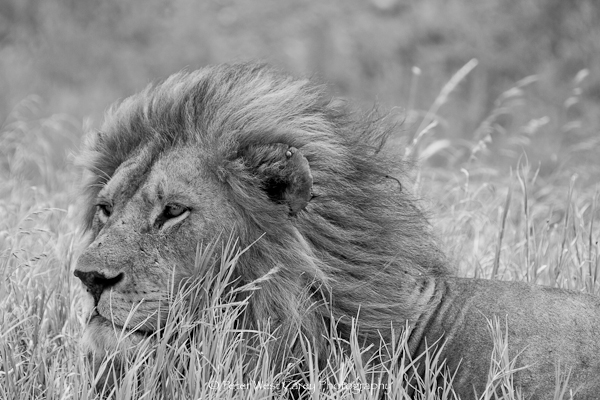

In [3]:
image.gray

In [4]:
image.histEqua(result="array")

array([[ 51,  52,  53, ...,  44,  51,  48],
       [ 53,  51,  52, ...,  47,  49,  48],
       [ 52,  51,  49, ...,  48,  48,  47],
       ..., 
       [230,  28,  28, ...,  47,  52,  45],
       [234, 215, 106, ..., 164,  43,  32],
       [ 18, 215, 219, ...,  75,  38,  42]], dtype=uint8)

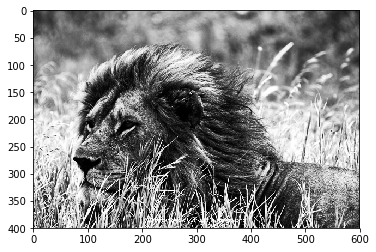

In [5]:
image.histEqua(result="plot")

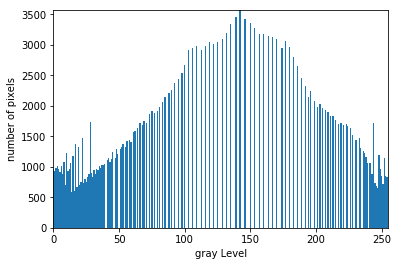

In [6]:
image.histEqua(result="hist")